<a href="https://colab.research.google.com/github/sharadnatarajSJSU/CMPE-258-assignment-3/blob/main/CMPE_258_assignment_3_part_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import matplotlib.pyplot as plt

We are trying to learn y = 3x1^2+4x2^2+X3^2+3x1+4x2+x3

In [19]:
n=200
d = 3
x = np.random.uniform(-1,1,(n,d))

In [20]:
x

array([[-0.53449478,  0.54398696,  0.2888914 ],
       [-0.79453655, -0.2285364 , -0.13342621],
       [-0.75767354,  0.9472271 , -0.07790656],
       [ 0.84348792,  0.49073671,  0.57389939],
       [-0.67467473,  0.67326513,  0.27852655],
       [ 0.00842146,  0.95967303,  0.88223605],
       [-0.10912344, -0.8582554 , -0.56467071],
       [-0.26598265,  0.38106671, -0.24434703],
       [ 0.39984753,  0.39093413,  0.14059272],
       [-0.5954976 ,  0.40709469,  0.93098757],
       [-0.18001945, -0.99591195, -0.99971647],
       [-0.3003809 ,  0.46939826,  0.50160863],
       [-0.72242507,  0.66742502, -0.80317683],
       [ 0.47277372,  0.28143572,  0.14081485],
       [-0.14185079, -0.26174524,  0.53288364],
       [ 0.52022044,  0.84007388,  0.03016024],
       [ 0.34641482, -0.7333347 , -0.86802107],
       [-0.03882744,  0.88799678,  0.81521305],
       [ 0.5715189 ,  0.84572541, -0.80968743],
       [-0.54138538, -0.71870148,  0.37493223],
       [-0.47884865, -0.16741195, -0.583

In [21]:
weights_true = np.array([[3,4,1],]).T

In [22]:
weights_true

array([[3],
       [4],
       [1]])

In [23]:
bias_true = np.array([10])

In [24]:
y_true = (x**2) @ weights_true + x @ weights_true

In [25]:
print(f'X : {x.shape}, weights : {weights_true.shape}, bias : {bias_true.shape}, y : {y_true.shape}')

X : (200, 3), weights : (3, 1), bias : (1,), y : (200, 1)


In [26]:
def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

generated data

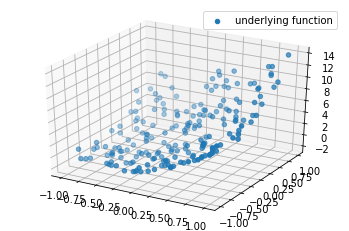

In [27]:
plot_3d(x,y_true)

Part A: 

Write  a colab  numpy only from scratch 3 layer deep neural network for non linear regression . Use proper non linear activation functions and proper number of hidden layer neurons - show the results / loss and epochs training and final output . You will be doing manual backprop and chain rule based gradient propagation 

Creating Linear class, MSE class

In [28]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean() #basically the derivative of MSE(loss function)

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient

In [29]:
class Linear:
  def __init__(self, input_dim: int, num_hidden: int ):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

Adding non Linearity to fit the training data better. The function used to create the data is non linear. Creating a ReLU class to add non Linearity

In [30]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient

Creating the non Linear model

In [31]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

16.985821516861865


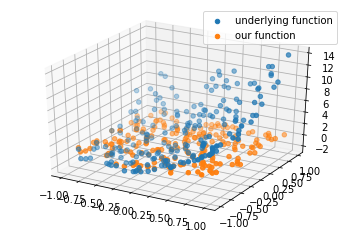

In [32]:
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

fitting the model using gradient descent

In [33]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

Epoch 0, loss 16.985821516861865
Epoch 1, loss 7.959043638688118
Epoch 2, loss 5.79517582747664
Epoch 3, loss 4.7405734038480185
Epoch 4, loss 3.878702083149562
Epoch 5, loss 3.173894162710763
Epoch 6, loss 2.6006655259630884
Epoch 7, loss 2.1228784706766506
Epoch 8, loss 1.731474269320993
Epoch 9, loss 1.4377788596915884
Epoch 10, loss 1.2217132733176164
Epoch 11, loss 1.0631128993713117
Epoch 12, loss 0.9446778940956253
Epoch 13, loss 0.8509657914997635
Epoch 14, loss 0.7816581827053642
Epoch 15, loss 0.7295679719695282
Epoch 16, loss 0.6868574466190981
Epoch 17, loss 0.6505928540787673
Epoch 18, loss 0.6199890000406834
Epoch 19, loss 0.5934315947049122
Epoch 20, loss 0.5701628386333644
Epoch 21, loss 0.5487159426385516
Epoch 22, loss 0.5273171369131824
Epoch 23, loss 0.5080604631097888
Epoch 24, loss 0.49058779756300347
Epoch 25, loss 0.47401122048893873
Epoch 26, loss 0.4589077118367871
Epoch 27, loss 0.4448658246505861
Epoch 28, loss 0.4318434518117693
Epoch 29, loss 0.41929461479

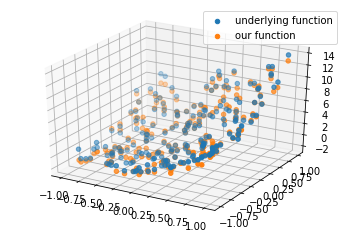

In [34]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x))

The model has fit the data. The loss is 0.31